# Survey Analysis

We perform experimentation for the purpose of survey analysis.  
Part of the reason is due to scatterplot visualization limits on data series.  
Also to automate some proccesses. 

Some questions to ask:
- What to do with missing values?

In [22]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as mp
import seaborn as sns

In [14]:
# import data
df = pd.read_csv("survey_data.csv")

In [15]:
# explore data
df.describe()

,NPS,X1,X2,X3,A1,A2,A3,A4,B1,B2,...,H4,overall_score,overall_A,overall_B,overall_C,overall_D,Overall_E,Overall_F,Overall_G,Overall_H
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,...,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,5.538194,3.031250,2.988889,2.989583,2.921528,3.070833,3.030556,2.920139,2.920833,2.927778,...,2.961111,3.003681,3.008333,2.982917,2.986528,2.985000,3.031736,3.024861,3.045694,3.005833
std,2.869152,1.403261,1.424452,1.421771,1.426478,1.419309,1.406985,1.435143,1.399636,1.409412,...,1.424452,0.822989,0.816448,0.713612,0.710058,0.696709,0.683550,0.691430,0.704810,0.698937
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.300000,2.300000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000
50%,6.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,3.700000,3.700000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.800000,5.000000,5.000000


In [20]:
df.head()

,Group,NPS,X1,X2,X3,A1,A2,A3,A4,B1,...,H4,overall_score,overall_A,overall_B,overall_C,overall_D,Overall_E,Overall_F,Overall_G,Overall_H
0,G1,5,2,4,1,2,2,2,3,5,...,4,2.3,2.0,2.5,3.8,2.5,4.3,3.3,2.8,3.5
1,G2,3,2,2,3,1,4,5,5,3,...,2,2.3,3.3,2.5,3.5,3.0,2.0,3.8,2.5,2.8
2,G3,3,2,2,3,3,4,2,3,4,...,2,2.3,3.0,3.0,3.3,2.3,2.5,4.0,3.5,2.0
3,G4,3,4,1,3,3,3,5,5,2,...,3,2.7,3.7,2.3,2.0,3.5,3.3,2.5,3.0,2.3
4,G5,5,3,2,2,2,2,1,2,3,...,1,2.3,1.7,3.3,3.3,3.8,3.8,4.0,4.3,2.8


In [16]:
# missing data
df.isnull().sum()

Group            0
NPS              0
X1               0
X2               0
X3               0
A1               0
A2               0
A3               0
A4               0
B1               0
B2               0
B3               0
B4               0
C1               0
C2               0
C3               0
C4               0
D1               0
D2               0
D3               0
D4               0
E1               0
E2               0
E3               0
E4               0
F1               0
F2               0
F3               0
F4               0
G1               0
G2               0
G3               0
G4               0
H1               0
H2               0
H3               0
H4               0
overall_score    0
overall_A        0
overall_B        0
overall_C        0
overall_D        0
Overall_E        0
Overall_F        0
Overall_G        0
Overall_H        0
dtype: int64

In [17]:
# test for correlations. Save and export to Excel later
df.corr()

,NPS,X1,X2,X3,A1,A2,A3,A4,B1,B2,...,H4,overall_score,overall_A,overall_B,overall_C,overall_D,Overall_E,Overall_F,Overall_G,Overall_H
NPS,1.000000,-0.006942,-0.023361,-0.019408,-0.014464,0.038244,-0.048834,-0.020608,-0.030568,-0.015815,...,-0.008138,-0.028327,-0.012002,-0.010406,0.079765,-0.002390,-0.018034,-0.039467,-0.031414,-0.004512
X1,-0.006942,1.000000,0.003998,0.012354,-0.011966,-0.007393,0.005148,-0.022915,-0.026691,0.008169,...,0.013819,0.579072,-0.009690,0.012262,-0.026359,0.049099,-0.011322,-0.038403,-0.030393,-0.014640
X2,-0.023361,0.003998,1.000000,-0.004518,-0.019239,0.026857,0.009185,0.017922,-0.016824,-0.011477,...,0.025816,0.577941,0.009640,0.016562,-0.052777,-0.043792,-0.033253,0.022718,-0.017560,0.011652
X3,-0.019408,0.012354,-0.004518,1.000000,-0.017878,0.023439,0.068248,0.016621,-0.000764,0.025287,...,-0.050641,0.580870,0.042819,0.039003,0.027051,-0.048775,-0.008169,-0.025680,-0.020052,-0.032457
A1,-0.014464,-0.011966,-0.019239,-0.017878,1.000000,-0.016474,0.005004,0.029864,-0.012511,0.040040,...,-0.009027,-0.027871,0.576841,0.010492,0.016519,0.009024,0.029781,-0.025006,-0.015439,0.005129
A2,0.038244,-0.007393,0.026857,0.023439,-0.016474,1.000000,0.000307,0.048154,0.011570,0.016108,...,0.026799,0.024585,0.569625,0.022603,0.015704,0.061373,-0.043935,0.002524,0.012532,-0.000557
A3,-0.048834,0.005148,0.009185,0.068248,0.005004,0.000307,1.000000,0.004995,-0.007240,-0.008699,...,-0.031307,0.049175,0.578173,-0.004532,-0.000005,-0.005345,-0.017989,-0.001710,0.016811,-0.013537
A4,-0.020608,-0.022915,0.017922,0.016621,0.029864,0.048154,0.004995,1.000000,-0.001074,-0.036523,...,-0.007299,0.007545,0.047896,-0.039264,0.023766,-0.022953,-0.014133,-0.014385,0.002099,-0.005840
B1,-0.030568,-0.026691,-0.016824,-0.000764,-0.012511,0.011570,-0.007240,-0.001074,1.000000,0.022816,...,0.017625,-0.024844,-0.003618,0.512049,-0.004290,0.001133,-0.001294,0.008354,-0.055716,0.002319
B2,-0.015815,0.008169,-0.011477,0.025287,0.040040,0.016108,-0.008699,-0.036523,0.022816,1.000000,...,0.041522,0.012032,0.029451,0.519256,-0.033610,-0.054465,0.056841,-0.015128,0.027320,0.012491


In [18]:
df.groupby("Group")["NPS"].mean()

Group
G1     5.625000
G10    5.270833
G11    5.864583
G12    5.166667
G13    5.770833
G14    5.437500
G15    5.583333
G2     5.260417
G3     5.552083
G4     5.489583
G5     5.937500
G6     5.468750
G7     5.447917
G8     5.447917
G9     5.750000
Name: NPS, dtype: float64

In [19]:
df.groupby("Group")["NPS"].count()

Group
G1     96
G10    96
G11    96
G12    96
G13    96
G14    96
G15    96
G2     96
G3     96
G4     96
G5     96
G6     96
G7     96
G8     96
G9     96
Name: NPS, dtype: int64

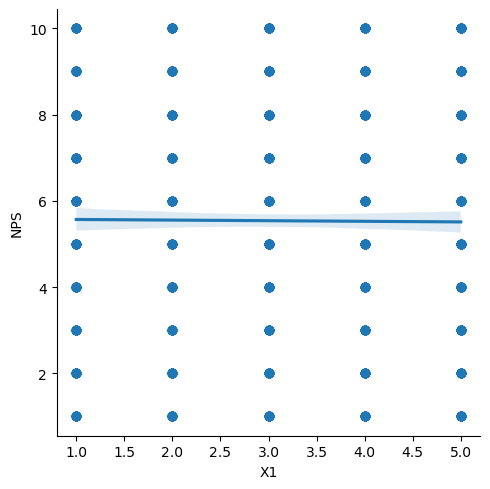

In [24]:
# visualize NPS and X1, whole entity
sns.lmplot(x = "X1", y = "NPS", data = df)

In [25]:
# visualize NPS and Overall_A, Group G1
df_g1 = df[df['Group']=="G1"]
print(df_g1)

     Group  NPS  X1  X2  X3  A1  A2  A3  A4  B1  ...  H4  overall_score  \
0       G1    5   2   4   1   2   2   2   3   5  ...   4            2.3   
15      G1    1   3   1   5   4   4   1   3   2  ...   4            3.0   
30      G1    4   3   4   3   4   2   1   1   5  ...   1            3.3   
45      G1    5   5   3   1   2   4   2   1   3  ...   5            3.0   
60      G1    8   2   2   2   1   3   5   2   1  ...   5            2.0   
...    ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..            ...   
1365    G1    1   1   3   3   3   3   5   3   2  ...   3            2.3   
1380    G1    6   1   3   5   5   3   3   1   1  ...   4            3.0   
1395    G1   10   1   5   3   3   1   2   5   5  ...   3            3.0   
1410    G1    1   4   3   5   4   1   3   1   4  ...   2            4.0   
1425    G1    3   3   1   2   2   2   2   1   5  ...   1            2.0   

      overall_A  overall_B  overall_C  overall_D  Overall_E  Overall_F  \
0           2.0        2.

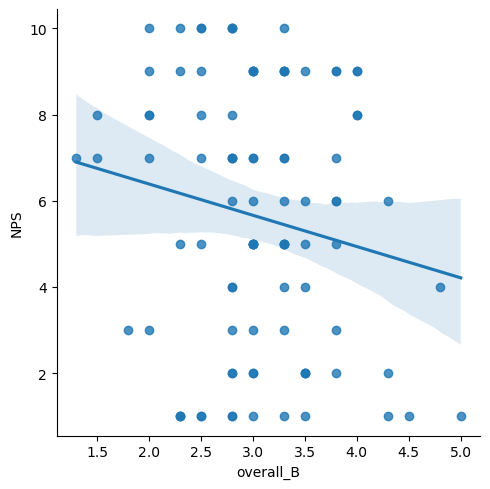

In [28]:
sns.lmplot(x="overall_B", y="NPS", data = df_g1)